# **Business Problem Understanding**

## **Context**

Dalam era digital yang terus berkembang, industri e-commerce telah menjadi salah satu pilar utama dalam perekonomian global. Perusahaan e-commerce menyediakan platform yang memungkinkan pelanggan untuk melakukan pembelian secara online dengan kenyamanan dan kemudahan. Perkembangan industri e-commerce ini didukung oleh meningkatnya penggunaan internet dan penggunaan smartphone di masyarakat. Namun, di tengah perkembangan tersebut, perusahaan ecommerce juga menghadapi tantangan, salah satunya adalah masalah churn atau kehilangan pelanggan.

Churn adalah suatu fenomena di mana pelanggan berhenti menggunakan produk atau layanan ecommerce dalam jangka waktu tertentu. Biasanya disebabkan oleh berbagai alasan, seperti harga yang terlalu tinggi, kualitas produk atau layanan yang tidak memuaskan, pelayanan pelanggan yang buruk, persaingan yang ketat, atau perubahan kebutuhan pelanggan (sumber [klaviyo.com](https://www.klaviyo.com/blog/predicting-churn-risk-our-new-model#:~:text=Churn%20rate%20is%20the%20percentage,your%20business%20that%20need%20attention)). Oleh karena itu, Churn merupakan sebuah tantangan yang dihadapi oleh perusahaan dengan bisnis E-Commerce, karena dapat menyebabkan kehilangan pendapatan, peningkatan biaya untuk mendapatkan pelanggan baru, dan penurunan kepuasan pelanggan.

Penanganan yang efektif terhadap churn menjadi suatu kebutuhan mendesak bagi perusahaan. Perusahaan E-Commerce harus memahami faktor-faktor apa saja yang mempengaruhi pelanggan untuk churn. Setelah memahami faktor tersebut, perusahaan dapat mengambil langkah marketing atau inovasi lainnya yang sesuai untuk mengurangi Churn. Sehingga perusahaan E-Commerce dapat mengoptimalkan retensi pelanggan, meningkatkan kepuasan pelanggan, dan pada akhirnya, mencapai pertumbuhan berkelanjutan di tengah persaingan yang semakin ketat.

Target :
<br>
0 : pelanggan yang tetap/ setia menggunakan E-commerce 
<br>
1 : pelanggan yang berhenti menggunakan E-commerce/ keluar

## **Problem Statement**

Perusahaan E-commerce menghadapi tantangan yang signifikan terkait adanya Churn pada perusahaan ini. Churn atau kehilangan pelanggan menjadi isu strategis yang mempengaruhi pendapatan perusahaan. Hal tersebut dikarenakan jika tingkat Churn semakin meningkat, maka pendapatan perusahaan akan semakin berkurang. Keberlanjutan bisnis e-commerce sangat bergantung pada pelanggan yang setia belanja di E-commerce ini, sehingga penting untuk meminimalisir terjadinya Churn. Selain itu, perusahaan juga harus lebih efisien dalam menentukan pengeluarannya, maka perusahaan harus mengetahui mana saja pelanggan yang berpotensi Churn/ tidak yang berguna untuk mengambil langkah marketing yang sesuai pada tiap customer.

Sehingga terdapat beberapa pertanyaan yang perlu dipecahkan :

1. **Identifikasi Faktor Churn**
<br>
Apa saja faktor- faktor yang mempengaruhi keputusan pelanggan untuk meninggalkan platform E-commerce (Churn)?

2. **Pengembangan Model Prediksi**
<br>
Bagaimana perusahaan dapat mengembangkan model prediksi yang efektif untuk menidentifikasi pelanggan yang perpotensi Churn?

## **Goals**

Maka berdasarkan permasalahan tersebut, perusahaan harus menyelidiki lebih lanjut terkait Churn yang dialami oleh E-Commerce ini. Dengan memahami alasan dibalik pelanggan yang Churn, perusahaan akan dapat mencari solusi yang tepat untuk menangani masalah ini. Oleh karena itu, perusahaan harus mengetahui faktor apa saja yang membuat pelanggan tetap berbelanja atau berhenti pada E-Commerce ini. 

Kemudian perusahaan juga membutuhkan alat untuk memprediksi kemungkinan pelanggan akan churn/ tidak, yaitu dengan membuat model prediksi. Dengan membangun model tersebut memungkinkan perusahaan untuk mengambil tindakan pencegahan terhadap pelanggan yang berpotensi churn.  Tujuan ini diupayakan tercapai agar dapat mengatasi masalah Churn dalam perusahaan E-Commerce ini, meningkatkan pendapatan perusahaan, dan meningkatkan retensi pelanggan.

## **Analytics Approach**

Kami akan menganalisis data untuk menemukan pola yang mebedakan customer yang berpotensi churn/ tidak. Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat mendeteksi apakah customer tersebut akan churn/ tidak.

## **Metric Evaluation**

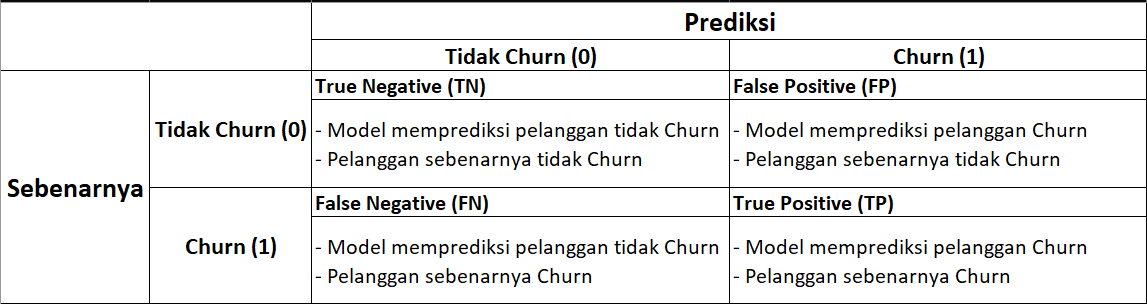

**Type 1 Error: False Positive**
- Kondisi dan Dampak : Dalam konteks prediksi Churn, Type 1 Error terjadi ketika model memprediksi bahwa seorang pelanggan akan Churn, tetapi kenyataannya, pelanggan tersebut tidak meninggalkan platform E-Commerce. Dampak dari kesalahan prediksi ini adalah perusahaan mungkin mengambil langkah-langkah pencegahan yang tidak diperlukan, seperti memberikan program diskon kepada pelanggan yang sebenarnya tidak berencana untuk meninggalkan platform. Ini dapat mengakibatkan peningkatan biaya perusahaan tanpa mendapatkan manfaat yang sepadan. Namun, pelanggan tersebut mungkin akan meningkatkan transaksi belanjanya di platform E-commerce ini.
- Terdapat biaya yang harus dikeluarkan perusahaan jika terjadi Type 2 Error, yaitu memberikan program diskon. Salah satu cara meningkatkan loyalitas customer adalah dengan memberikan diskon, seperti voucher gratis ongkos kirim, reward customer loyal, diskon pemebelian barang dalam jumlah banyak, dsb. Diskon tersebut dapat diberikan secara langsung atau dalam bentuk kupon (sumber [ottopay.com](https://ottopay.id/blog/artikel/contoh-loyalty-program/)). Sehingga biaya yang harus dikeluarkan perusahaan adalah Rp50.000 per customer.

**Type 2 Error: False Negative**
- Kondisi dan Dampak : Dalam hal Type 2 Error, model memprediksi bahwa pelanggan tidak akan Churn, padahal kenyataannya, pelanggan tersebut benar-benar meninggalkan platform E-Commerce. Dampak dari kesalahan prediksi ini lebih serius karena perusahaan kehilangan pelanggan dan pendapatan yang mungkin dapat dipertahankan atau ditingkatkan melalui langkah-langkah pencegahan. Perusahaan menjadi tidak mengambil tindakan yang diperlukan untuk mempertahankan hubungan dengan pelanggan yang sebenarnya berpotensi untuk Churn.
- Selain kehilangan pendapatan, terdapat biaya yang harus dikeluarkan perusahaan jika terjadi Type 2 Error, yaitu biaya *Customer acquisition cost* atau biaya akuisisi pelanggan. CAC merupakan cara untuk mengukur berapa banyak uang yang dihabiskan bisnis dalam menarik pelanggan baru (sumber [mekari.com](https://qontak.com/blog/cara-menghitung-customer-acquisition-cost/)). Rumusnya adalah sebagai berikut : 
<br>CAC = (Total Biaya Pemasaran + Total Biaya Penjualan)/ Jumlah Pelanggan Baru
<br>Kita asumsikan perusahaan menghabiskan Rp150.000.000 dalam biaya pemasaran dan penjualan dalam bulan tertentu dan berhasil mendapatkan 1000 pelanggan baru, maka biaya yang harus dikeluarkan perusahaan adalah Rp150.000 per customer

Berdasarkan dampak yang terjadi akibat kesalahan prediksi oleh model, fokus utama adalah pada mengurangi False Negative (FN). Kesalahan FN memiliki dampak yang lebih besar pada perusahaan dibandingkan FP, sehingga kami mengutamakan F2-Score sebagai metrik evaluasi model. Pemilihan F2-Score didasarkan dari biaya yang dikeluarkan perusahaan pada FN lebih dari 2x lebih besar dibandingkan FP. Sehingga, perusahaan akan lebih berorientasi untuk mengidentifikasi pelanggan yang berpotensi Churn, bahkan jika ada sedikit kesalahan dalam memprediksi pelanggan yang sebenarnya tidak Churn. Ini memberikan perusahaan kesempatan untuk mengambil tindakan preventif dan mempertahankan pelanggan, yang dapat mengurangi kerugian pendapatan akibat Churn.


# **Data Understanding**

Dataset source : <https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data>

Note :
- Dataset tidak seimbang antara yang Churn dengan yang tidak Churn
- Setiap baris merepresentasikan informasi terkait pelanggan yang berbelanja di platform E-Commerce

**Atribute Information**


| **Data** | **Variable** | **Description** |
|:---:|:---:|:---:|
| E Comm | CustomerID | ID unik pelanggan |
| E Comm | Churn | Tanda Churn |
| E Comm | Tenure | Masa pelanggan bergabung dalam organisasi |
| E Comm | PreferredLoginDevice | Perangkat login yang disukai pelanggan |
| E Comm | CityTier | Tingkatan kota |
| E Comm | WarehouseToHome | Jarak antara gudang ke rumah pelanggan |
| E Comm | PreferredPaymentMode | Metode pembayaran yang disukai pelanggan |
| E Comm | Gender | Jenis kelamin pelanggan |
| E Comm | HourSpendOnApp | Jumlah jam yang dihabiskan pelanggan di aplikasi seluler atau situs web |
| E Comm | NumberOfDeviceRegistered | Total jumlah perangkat yang terdaftar pada pelanggan tertentu |
| E Comm | PreferedOrderCat | Kategori pesanan yang disukai pelanggan dalam sebulan terakhir |
| E Comm | SatisfactionScore | Skor kepuasan pelanggan terhadap layanan |
| E Comm | MaritalStatus | Status pernikahan pelanggan |
| E Comm | NumberOfAddress | Total jumlah alamat yang ditambahkan pada pelanggan tertentu |
| E Comm | Complain | Ada/ tidak keluhan yang diajukan dalam sebulan terakhir |
| E Comm | OrderAmountHikeFromlastYear | Persentase peningkatan pesanan dari tahun lalu |
| E Comm | CouponUsed | Total jumlah kupon yang digunakan dalam sebulan terakhir |
| E Comm | OrderCount | Total jumlah pesanan dalam sebulan terakhir |
| E Comm | DaySinceLastOrder | Hari sejak pesanan terakhir oleh pelanggan |
| E Comm | CashbackAmount | Rata-rata cashback dalam sebulan terakhir (Rupee) |

In [277]:
# import library explorasi data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore")

In [278]:
df = pd.read_csv('E_Commerce_Dataset.csv')
display(df.head(), df.tail())

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


Tabel diatas menampilkan 5 data teratas dan 5 data terbawah dari keseluruhan dataset.

In [279]:
# informasi tipe dataset kita
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

# **Data Cleaning**
## **Numerical Data Checking**

In [280]:
# Statistik deskriptif (numerik) dataset kita
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


Jika kita lihat tabel di atas, semua data numerik sudah sesuai pada umumnya.

## **Categorical Data Checking**

In [281]:
# Print setiap unique dalam data kategorik untuk memeriksa apahkah ada typo ataupun data yang sama dengan nama yang berbeda.

unique_dict = {}

for col in df.columns:                                                  # Mencari unique pada data kategorik dan menyimpannya dalam dictionary
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        unique_dict[col] = df[col].unique()

for col, unique in unique_dict.items():                                 # Print setiap unique pada data kategorik dengan looping.
    print(f"'{col}' unique:\n{unique}\n")

'PreferredLoginDevice' unique:
['Mobile Phone' 'Phone' 'Computer']

'PreferredPaymentMode' unique:
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

'Gender' unique:
['Female' 'Male']

'PreferedOrderCat' unique:
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

'MaritalStatus' unique:
['Single' 'Divorced' 'Married']



Seluruh data kategorik tidak ada yang typo, namun ada data yang sama dengan nama yang berbeda. Sehingga data tersebut perlu diganti namanya menjadi satu kategori saja.

In [282]:
# Kategori PreferredLoginDevice
df['PreferredLoginDevice'].replace(['Phone'], ['Mobile Phone'], inplace=True)

# Kategori PreferredPaymentMode
df['PreferredPaymentMode'].replace(['CC'],['Credit Card'],inplace=True)
df['PreferredPaymentMode'].replace(['Cash on Delivery'],['COD'],inplace=True)

# Kategori PreferedOrderCat
df['PreferedOrderCat'].replace(['Mobile'],['Mobile Phone'],inplace=True)


In [283]:
# Statistik deskriptif (kategori) dataset kita
DCategory = df.describe(include='object').T
DCategory['%Top'] = (DCategory['freq']/DCategory['count']*100).astype(int)
DCategory

,count,unique,top,freq,%Top
PreferredLoginDevice,5630,2,Mobile Phone,3996,70
PreferredPaymentMode,5630,5,Debit Card,2314,41
Gender,5630,2,Male,3384,60
PreferedOrderCat,5630,5,Mobile Phone,2080,36
MaritalStatus,5630,3,Married,2986,53


## **Duplicated Data**

In [284]:
df.duplicated().sum()

0

Tidak ditemukan adanya data duplikat.

# **Outliers**

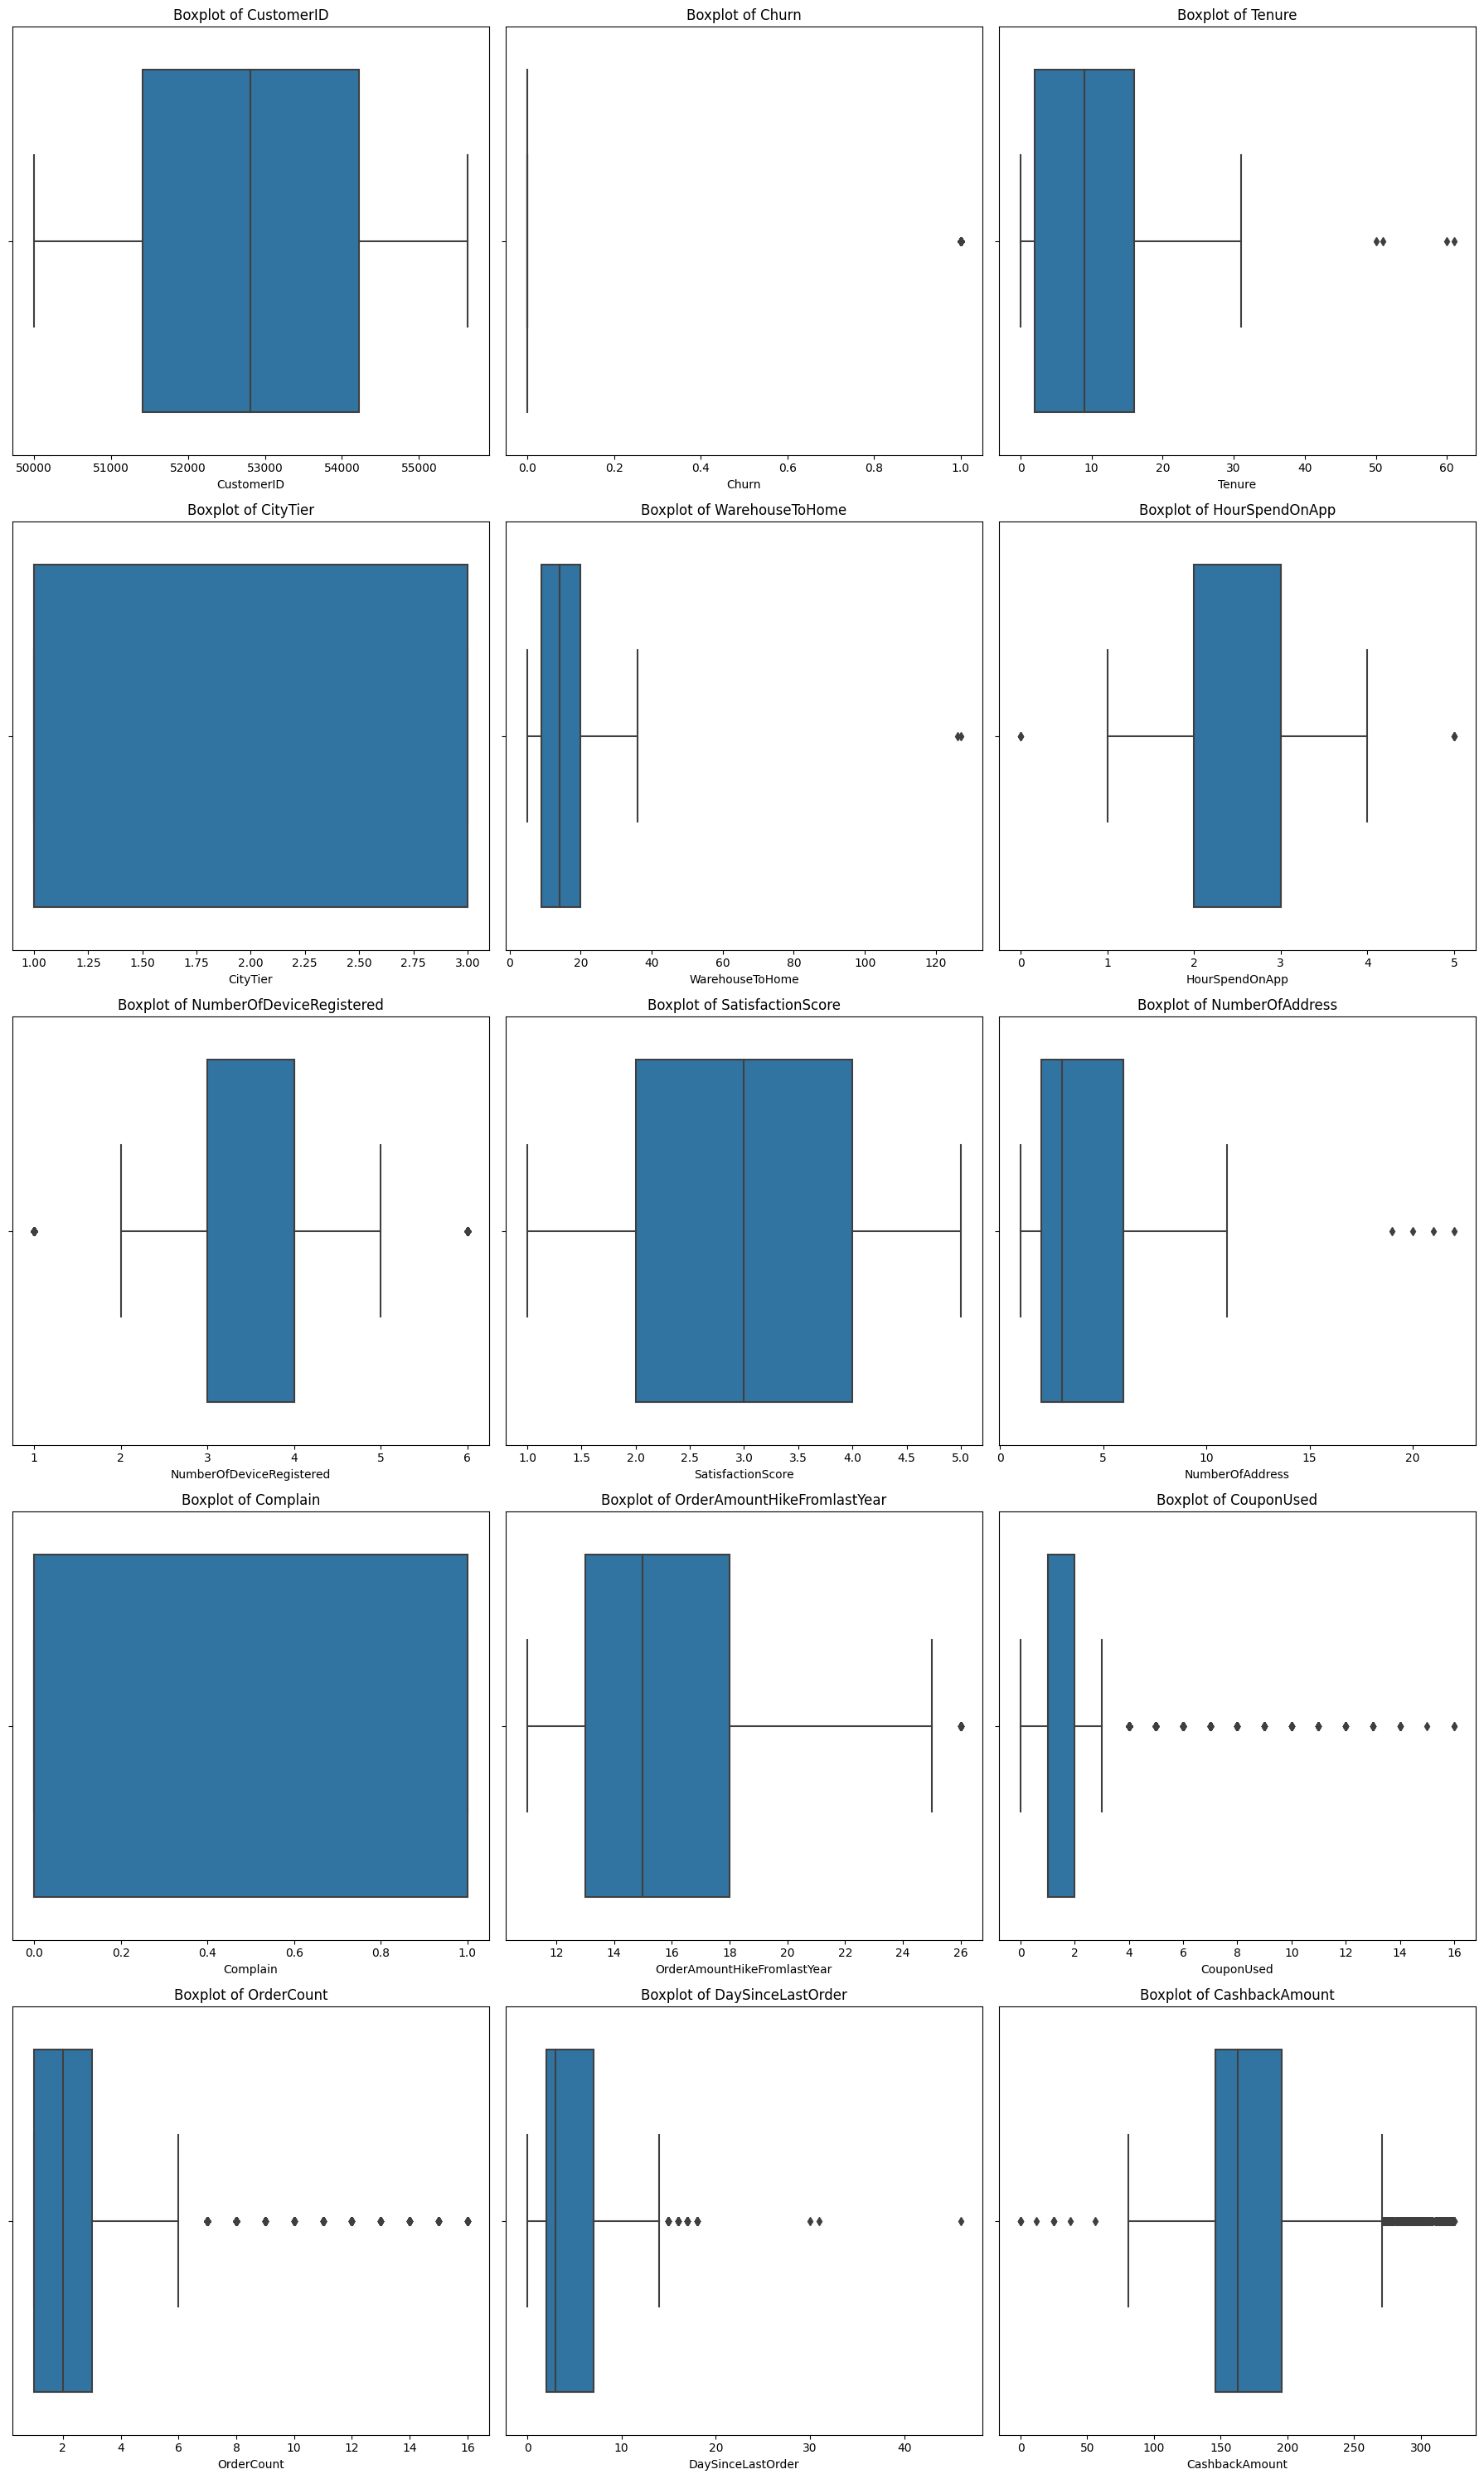

In [285]:
def numerical_boxplots(data):                                                           # Define function untuk membuat boxplot semua data numerik.
    numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()                                                                 # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):                                      # Membuat boxplot untuk setiap data numerik dengan looping
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    # Menyembunyikan subplots yang kosong
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_boxplots(df)

Dikarenakan outliers yang ada tidak terlalu banyak dan juga masih merupakan data yang dapat dipakai untuk analisa maka diputuskan untuk tidak menghapus outlier.

## **Missing Values**

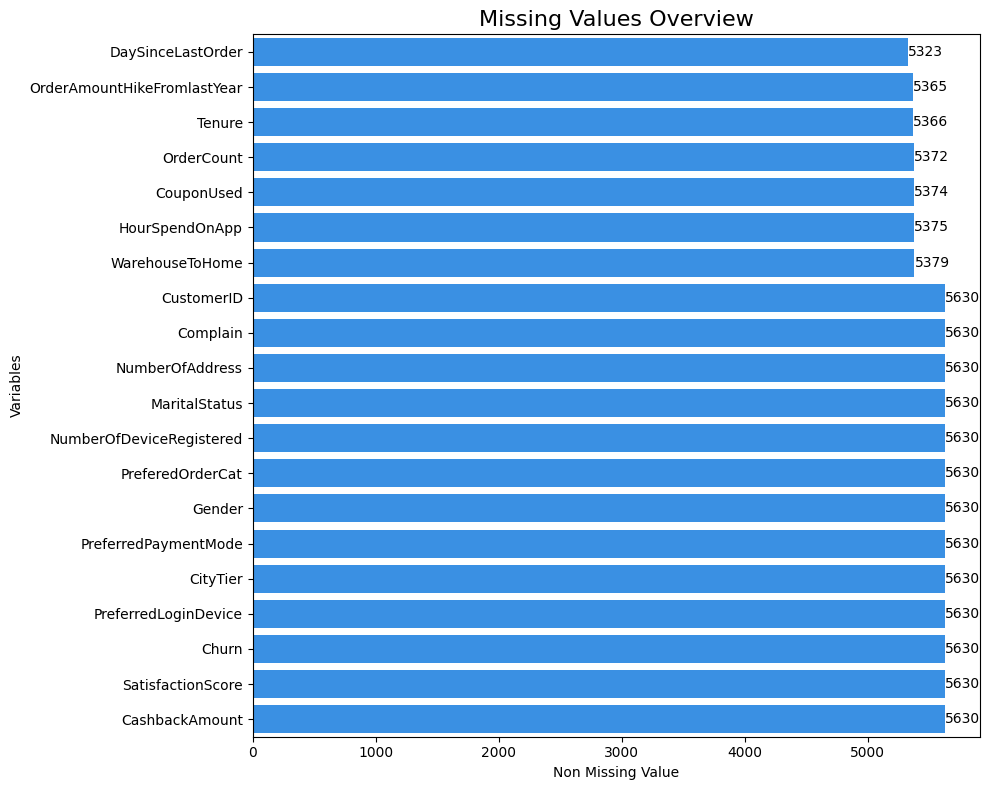

In [286]:
# Jumlah per kolom
missing_values = pd.DataFrame(df.count()).reset_index()
missing_values = missing_values.rename(columns={'index':'Variables',
                                        0:'Missing Values'}).sort_values('Missing Values', ascending=True)

# Rinkasan untuk Plotting
plt.figure(figsize=(10,8))
ax = sns.barplot(missing_values, y='Variables', x='Missing Values', color='dodgerblue')

for index, value in enumerate(missing_values['Missing Values']):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)
    
plt.title('Missing Values Overview', fontsize=16)
plt.xlabel('Non Missing Value')

plt.tight_layout();

Text(0.5, 1.0, 'Distribution of Missing Value')

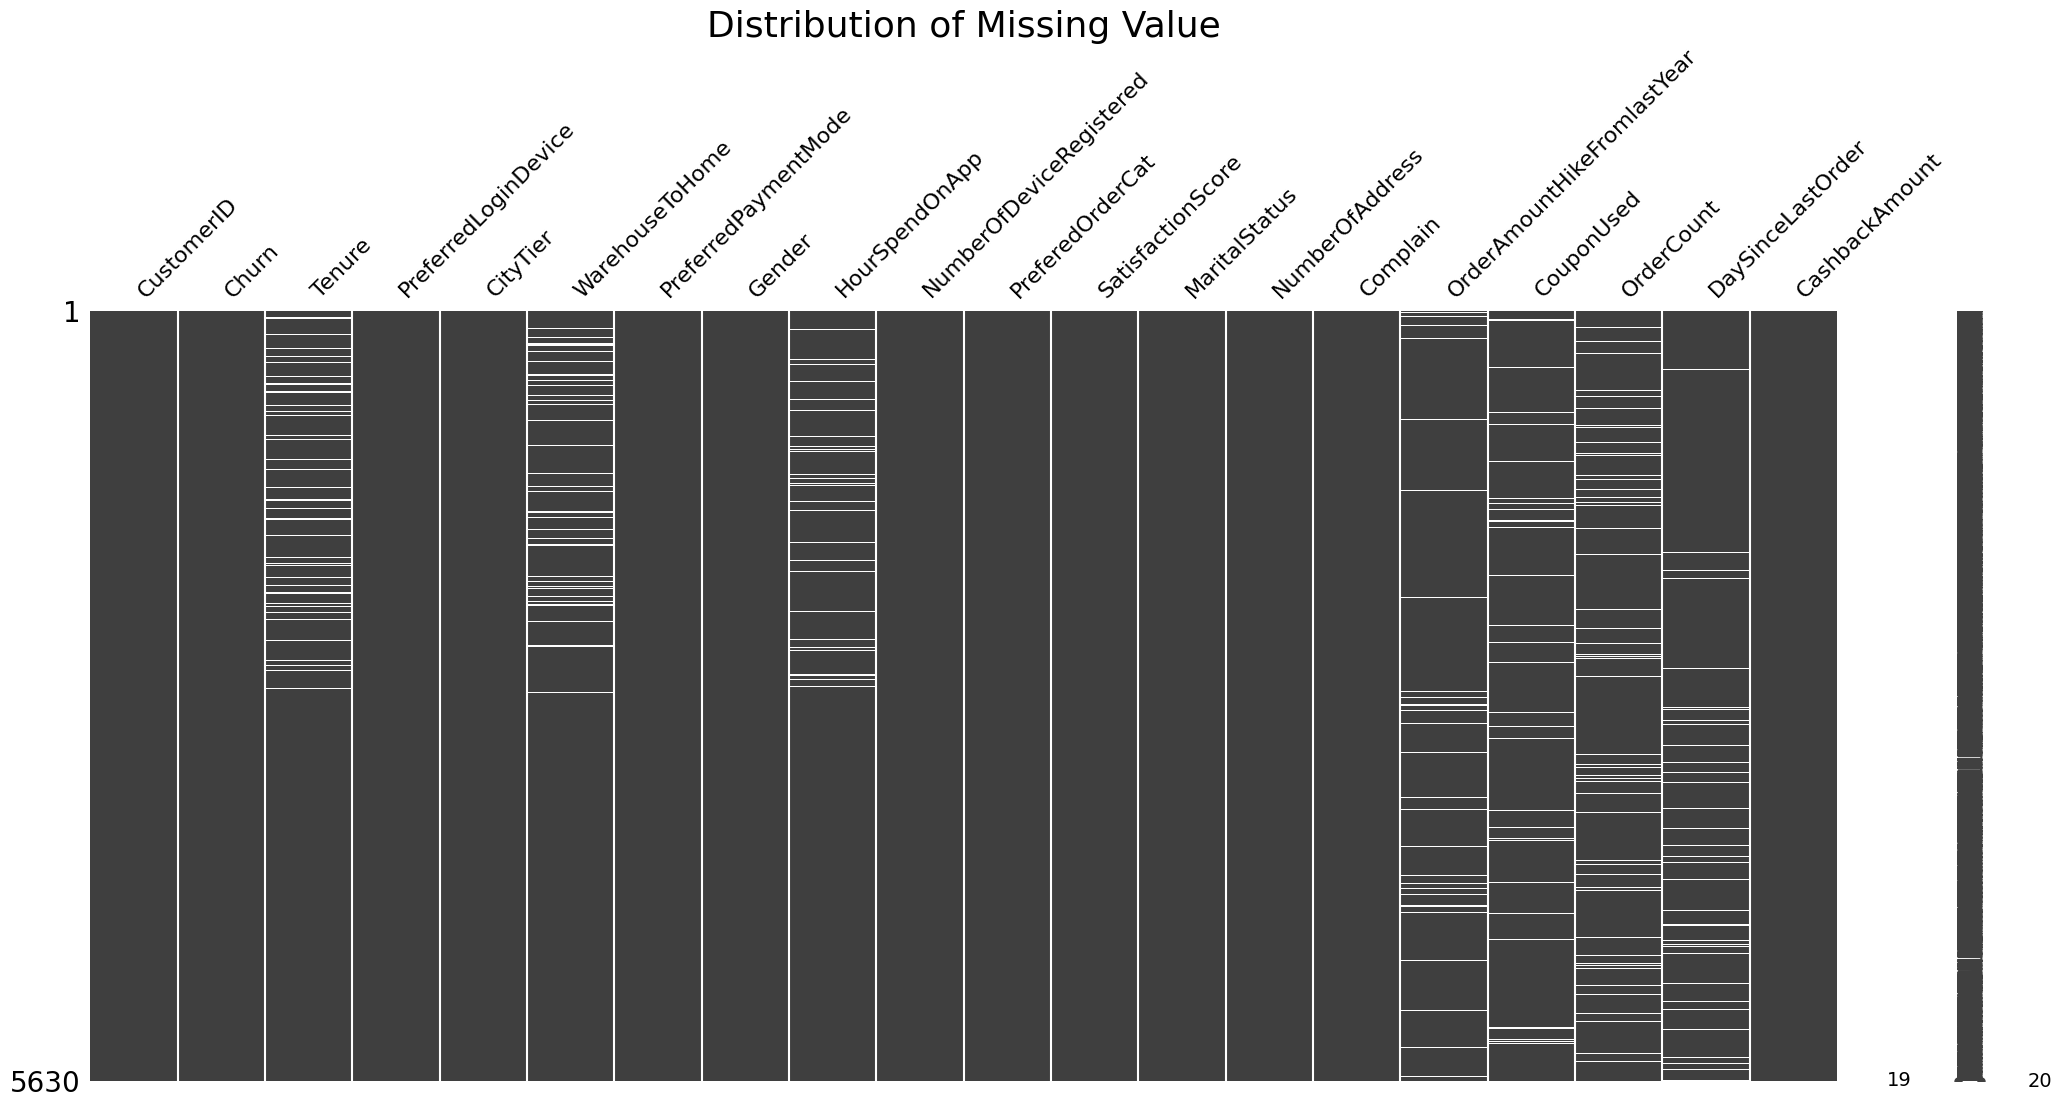

In [287]:
msno.matrix(df)
plt.title('Distribution of Missing Value', fontsize=26)

Semua nilai yang hilang merupakan data numerik. <br> Jumlah nilai yang hilang tidak terlalu cukup signifikan per kolom, namun nilai-nilai yang hilang tersebut tersebar luas di berbagai variabel. Oleh karena itu, data yang mempunyai nilai yang hilang tidak dapat dihapus begitu saja.

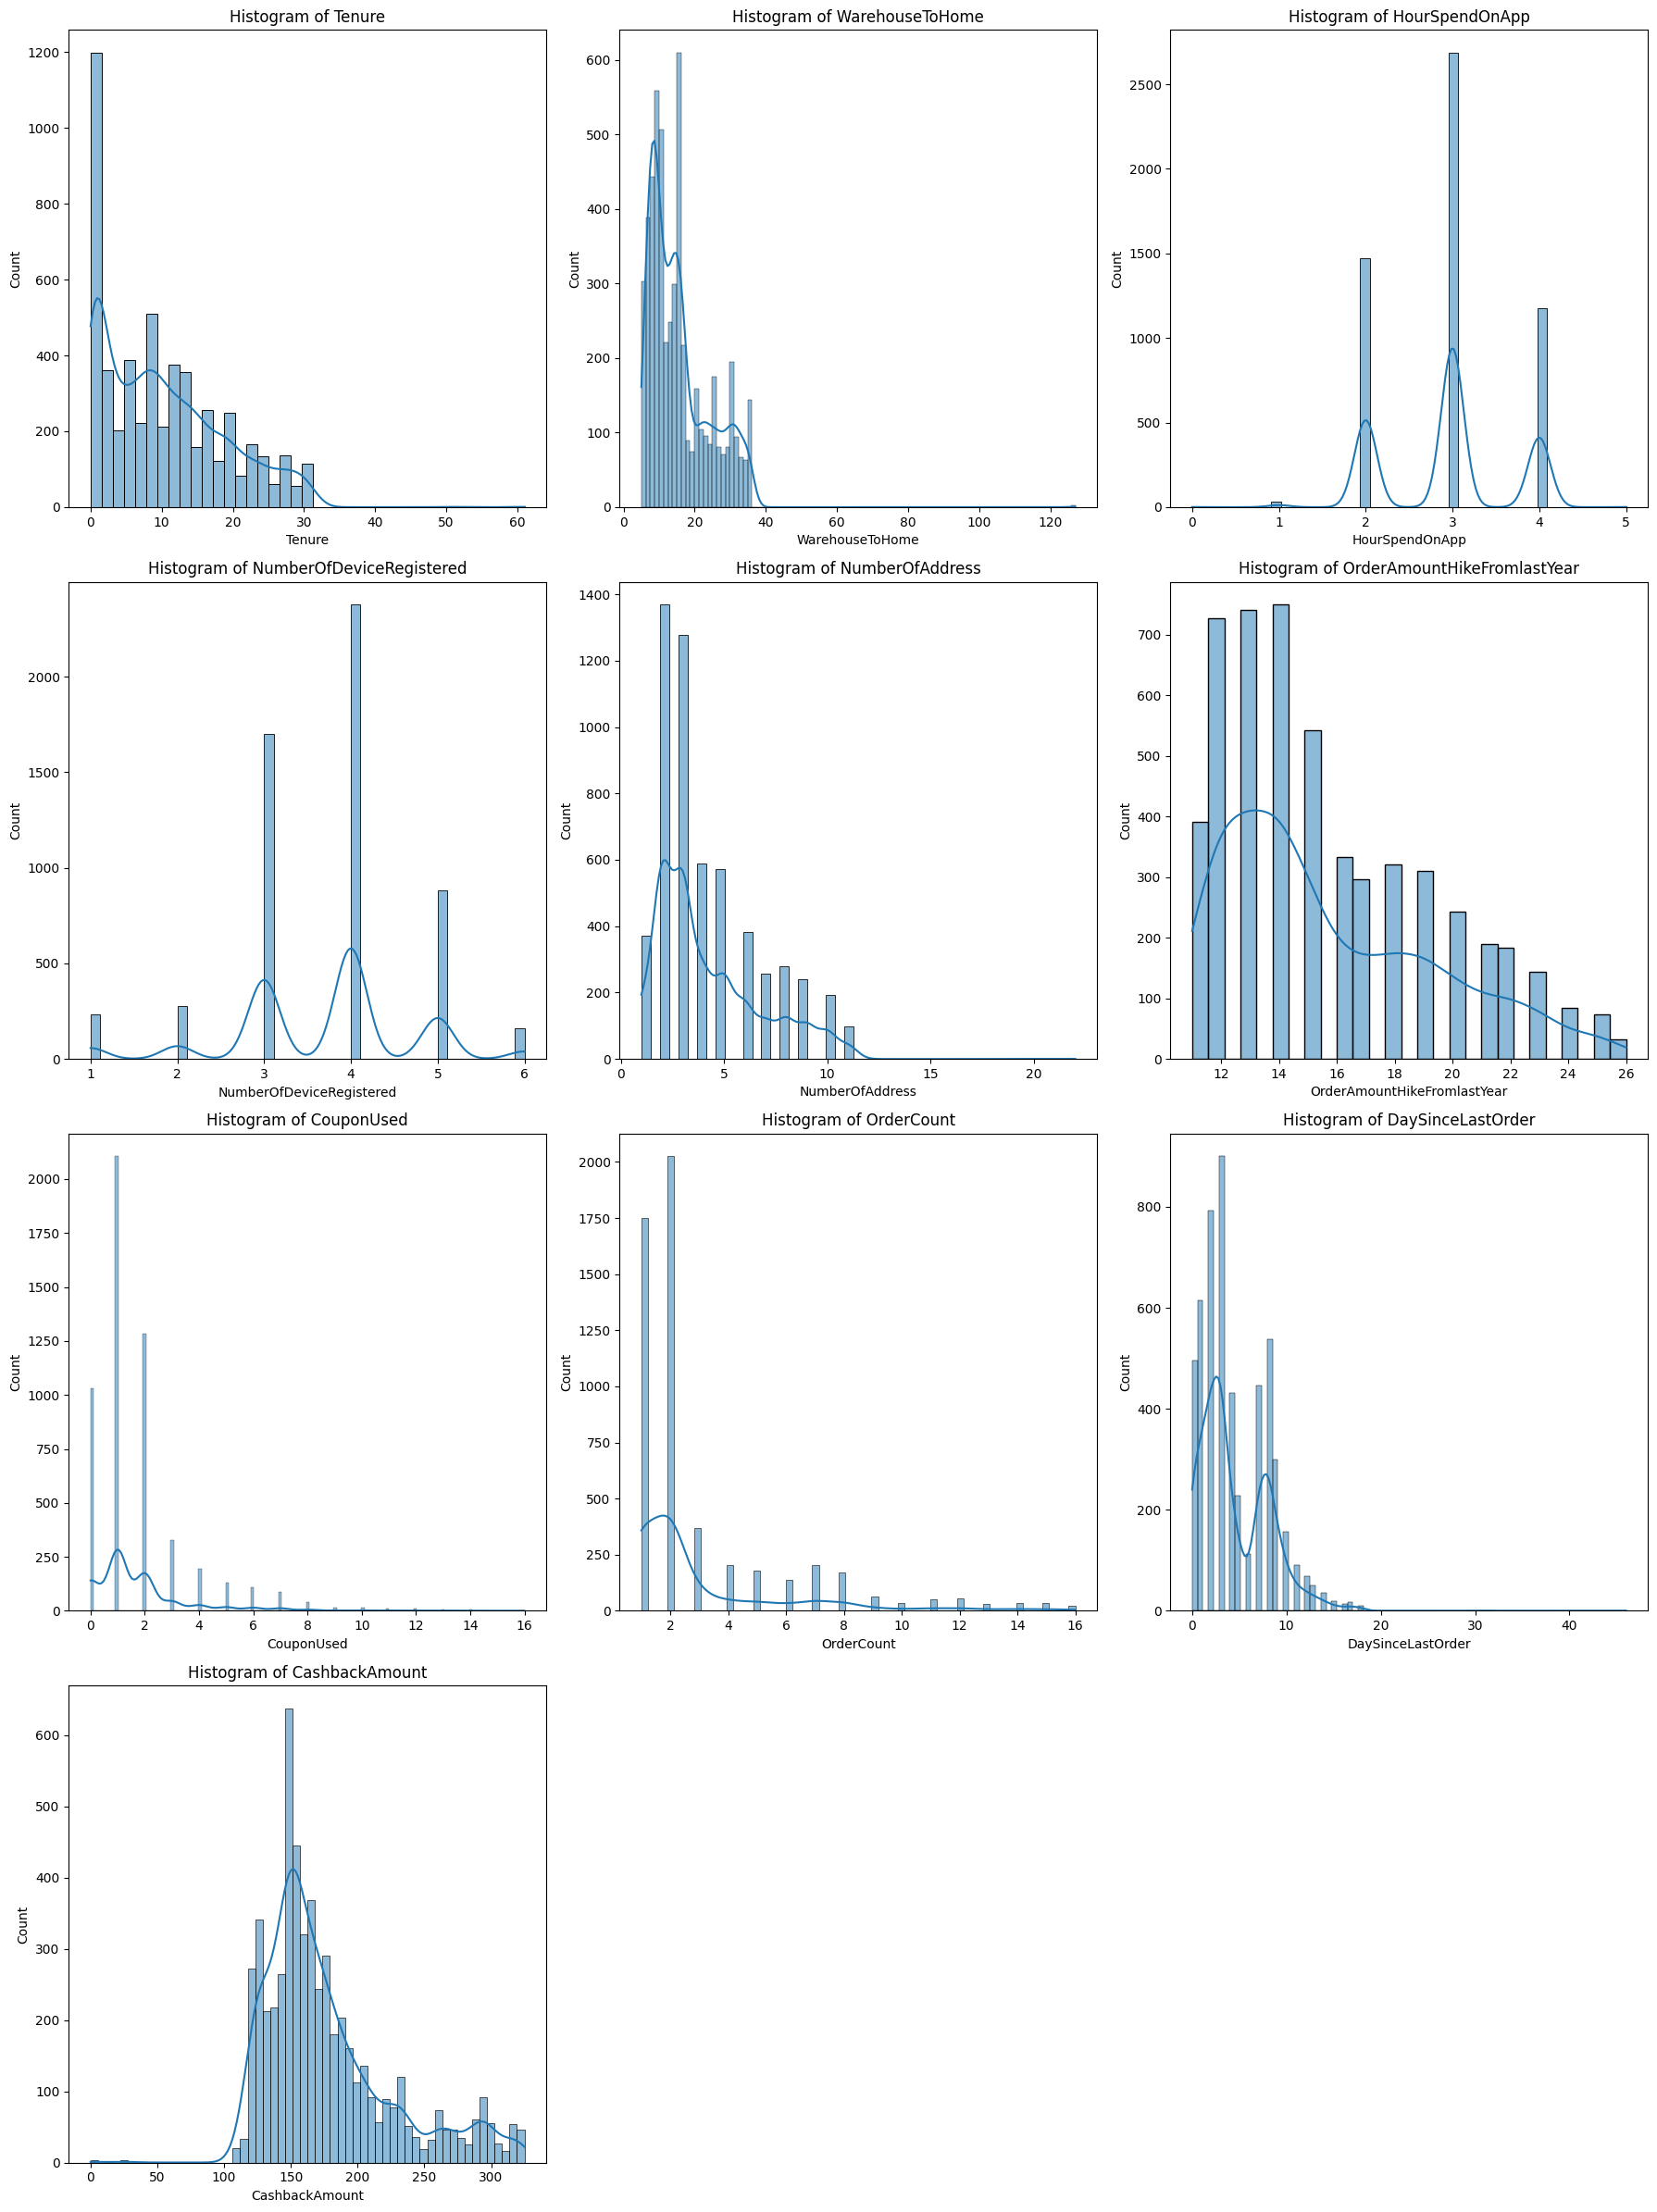

In [288]:
def numerical_histogram(data):                                                          # Define function untuk membuat histogram semua data numerik.
    numerical_columns = data.select_dtypes(include=['int64','float64']).drop(columns=['CustomerID','Churn','CityTier','SatisfactionScore','Complain']).columns
    num_plots = len(numerical_columns)
    num_rows = (num_plots + 2) // 3

    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
    axes = axes.ravel()                                                                 # Flatten the 2D array of axes

    for i, column in enumerate(numerical_columns):                                      # Membuat histogram untuk setiap data numerik dengan looping
        sns.histplot(data=data, x=column, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {column}')

    # Menyembunyikan subplots yang kosong
    for i in range(num_plots, num_rows * 3):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


numerical_histogram(df)

In [289]:
shapirocolumns = df.select_dtypes(include=['int64','float64']).drop(columns=['CustomerID','Churn','CityTier','SatisfactionScore','Complain']).columns


shapiro_df = pd.DataFrame(columns=['Variables','Shapiro Pvalue'])
for value in shapirocolumns:
    pvalue = shapiro(df[value].dropna())[1]
    shapiro_df.loc[len(shapiro_df)] = {'Variables':value,'Shapiro Pvalue':pvalue}
shapiro_df

,Variables,Shapiro Pvalue
0,Tenure,0.0
1,WarehouseToHome,0.0
2,HourSpendOnApp,0.0
3,NumberOfDeviceRegistered,0.0
4,NumberOfAddress,0.0
5,OrderAmountHikeFromlastYear,0.0
6,CouponUsed,0.0
7,OrderCount,0.0
8,DaySinceLastOrder,0.0
9,CashbackAmount,0.0


Dari histogram dan uji normalitas **(Shapiro Pvalue < 0.05)** didapati semua data numerik tidak terdistribusi normal.<br> Oleh karena itu, nilai yang hilang ini dapat diisi dengan median.

In [290]:
# Filter Data Numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Mengisi data dengan median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# **Export Clean Data**

In [291]:
# Export data yang sudah bersih untuk keperluan eksternal dari python analysis
df.to_csv('CleanEcommerceChurn.csv', index=False)

# **Exploratory Data Analysis**

### **1. Churn vs Stay**

''

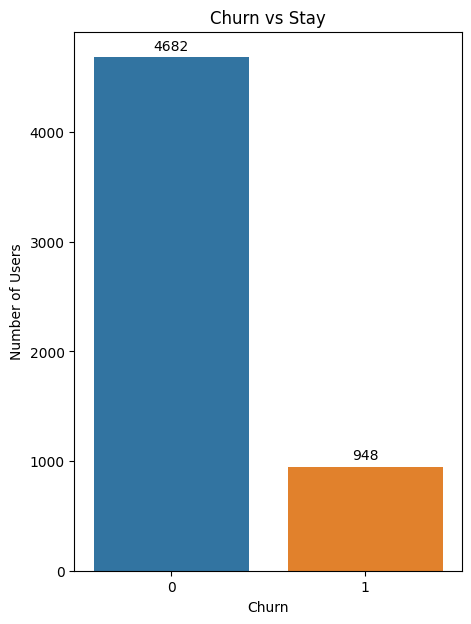

In [292]:
plt.figure(figsize=(5,7))
plt.title('Churn vs Stay')
ax = sns.countplot(data=df, x='Churn')
plt.ylabel('Number of Users')
for p in ax.patches:
    ax.annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
;

**Insights:**

Data yang kita miliki tidak seimbang: lebih banyak user yang **stay/tidak churn (4682)** daripada yang **churn (948).** Artinya dalam sample data pelanggan yang kita miliki yaitu, 5630 pelanggan, tingkat Churnnya mencapai **16.8%**. Menurut hasil survei yang dilakukan oleh Econsultancy pada tahun 2022, churn rate rata-rata di industri e-commerce adalah 10,8%. Studi ini juga menemukan bahwa perusahaan-perusahaan dengan churn rate terendah memiliki tingkat pertumbuhan dan profitabilitas yang lebih tinggi. Berdasarkan grafik di atas, terlihat bahwa tingkat Churn perusahaan E-Commerce ini lebih tinggi dari nilai rata-rata. Sehingga dapat dikatakan tingkat pertumbuhan dan profitabilitasnya masih rendah.

### **2. Heatmap Korelasi**

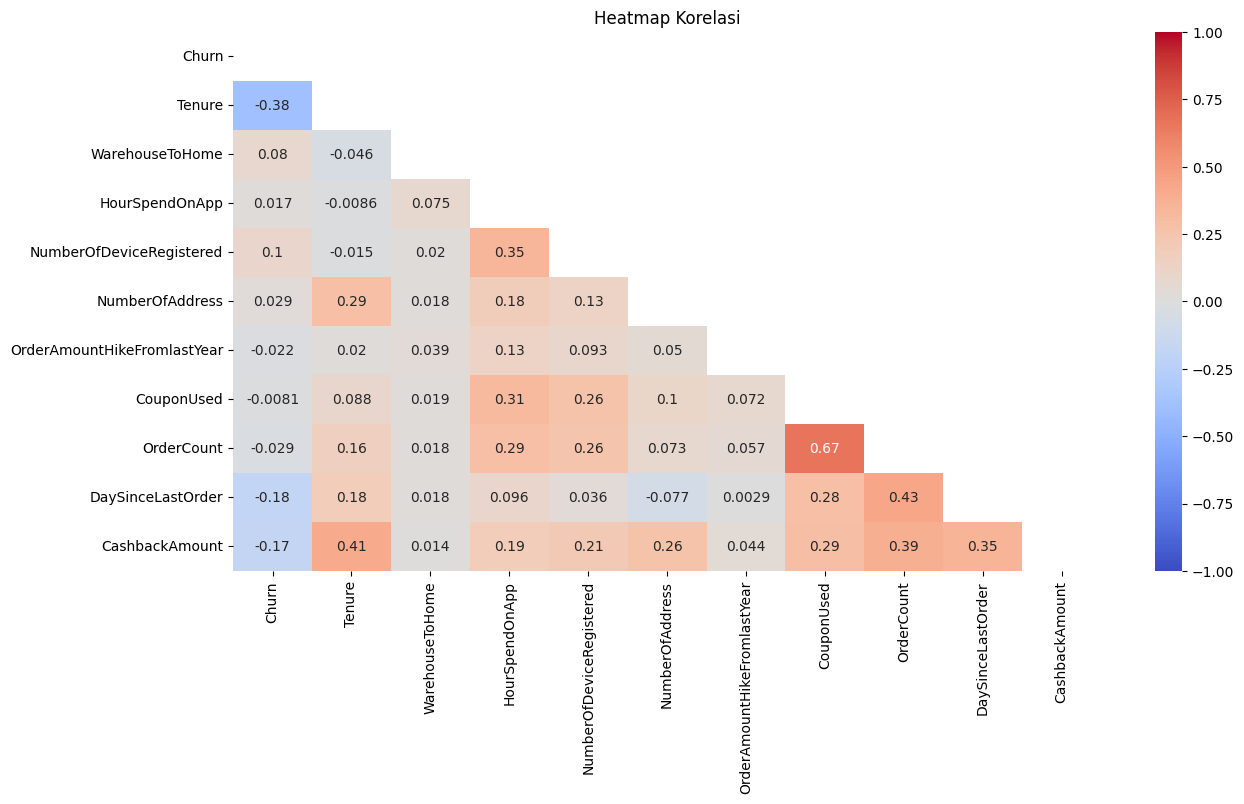

In [293]:
matrix = df.drop(columns=['CustomerID','CityTier','SatisfactionScore','Complain']).corr(numeric_only=True, method='spearman')
plt.figure(figsize=(14,7))
plt.title('Heatmap Korelasi')
sns.heatmap(data=matrix,
            annot=True, 
            cmap='coolwarm', 
            center=0, 
            mask=np.triu(matrix), 
            vmin=-1, 
            vmax=1 
            );

**Insights:**
- Tidak ada korelasi yang kuat antara fitur numerical lainnya dengan Churn. Nilai korelasi yang paling besar dengan Churn adalah fitur Tenure dengan korelasi negatif **(-0.38)** Artinya adalah semakin pendek waktu pelanggan bergabung, maka semakin besar potensi pelanggan tersebut Churn. Namun, kedua fitur tersebut masih memiliki hubungan yang lemah.
- Tidak ada korelasi yang kuat **(nilai korelasi > 0.6)** di antara semua variabel, kecuali **CouponUsed vs OrderCount**. Artinya semakin banyak kupon digunakan, maka semakin banyak jumlah pesanan yang dilakukan pelanggan tersebut.

### **3. Churn vs Data Kategorikal**

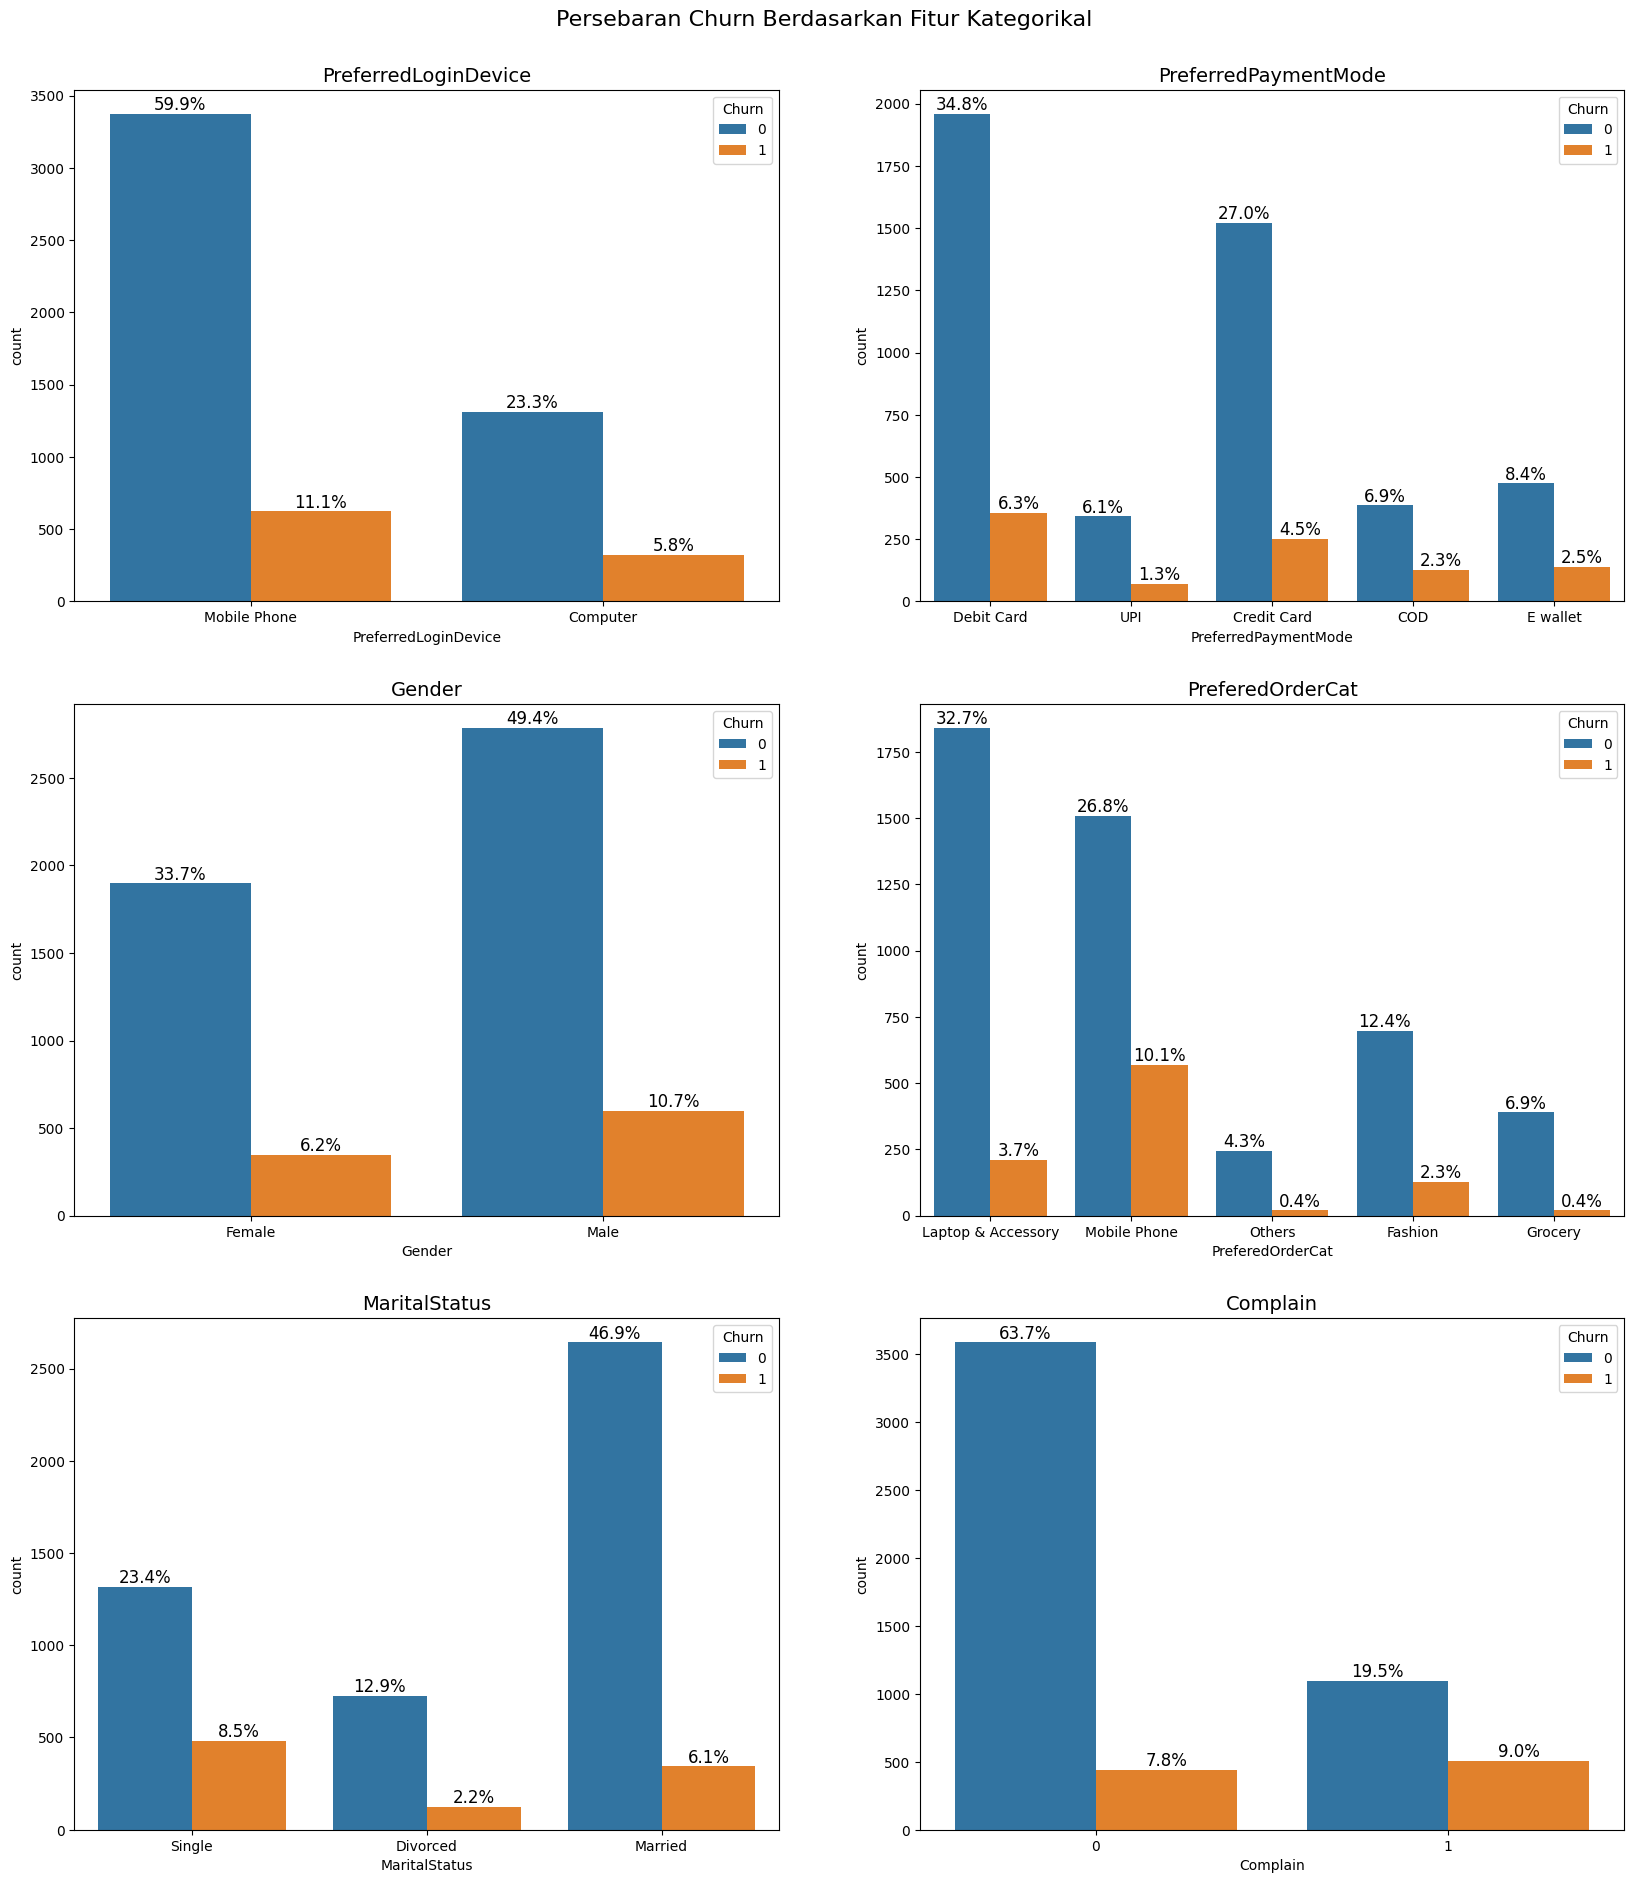

In [294]:
cat_feature = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']

plt.figure(figsize=(20, 20))
subplot = 1

for cat in cat_feature:
    plt.subplot(3, 2, subplot)
    ax = sns.countplot(data=df, x=cat, hue='Churn')
    
    # Add percentage annotations
    total_count = len(df[cat])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x_position = p.get_x() + p.get_width() / 2
        y_position = p.get_height()
        ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom', fontsize=12)
    
    plt.title(cat, fontsize=14)
    subplot += 1

plt.suptitle('Persebaran Churn Berdasarkan Fitur Kategorikal', y=1.02, fontsize=16)
plt.subplots_adjust(top=0.98)
plt.show()

**Insight**

Terlihat dari grafik Persebaran Churn di atas, total jumlah unique disetiap data kategori tidak sama/ tidak seimbang. Sehingga kita tidak dapat langsung menyimpulkan bahwa jumlah Churn yang paling banyak berada disalah satu kategori saja. Oleh karena itu kita perlu membuat datanya seimbang terlebih dahulu, caranya dengan menganggap bahwa data fitur disetiap unique adalah 100%. Setelah itu barulah kita dapat melihat data apa saja yang lebih banyak Churn.

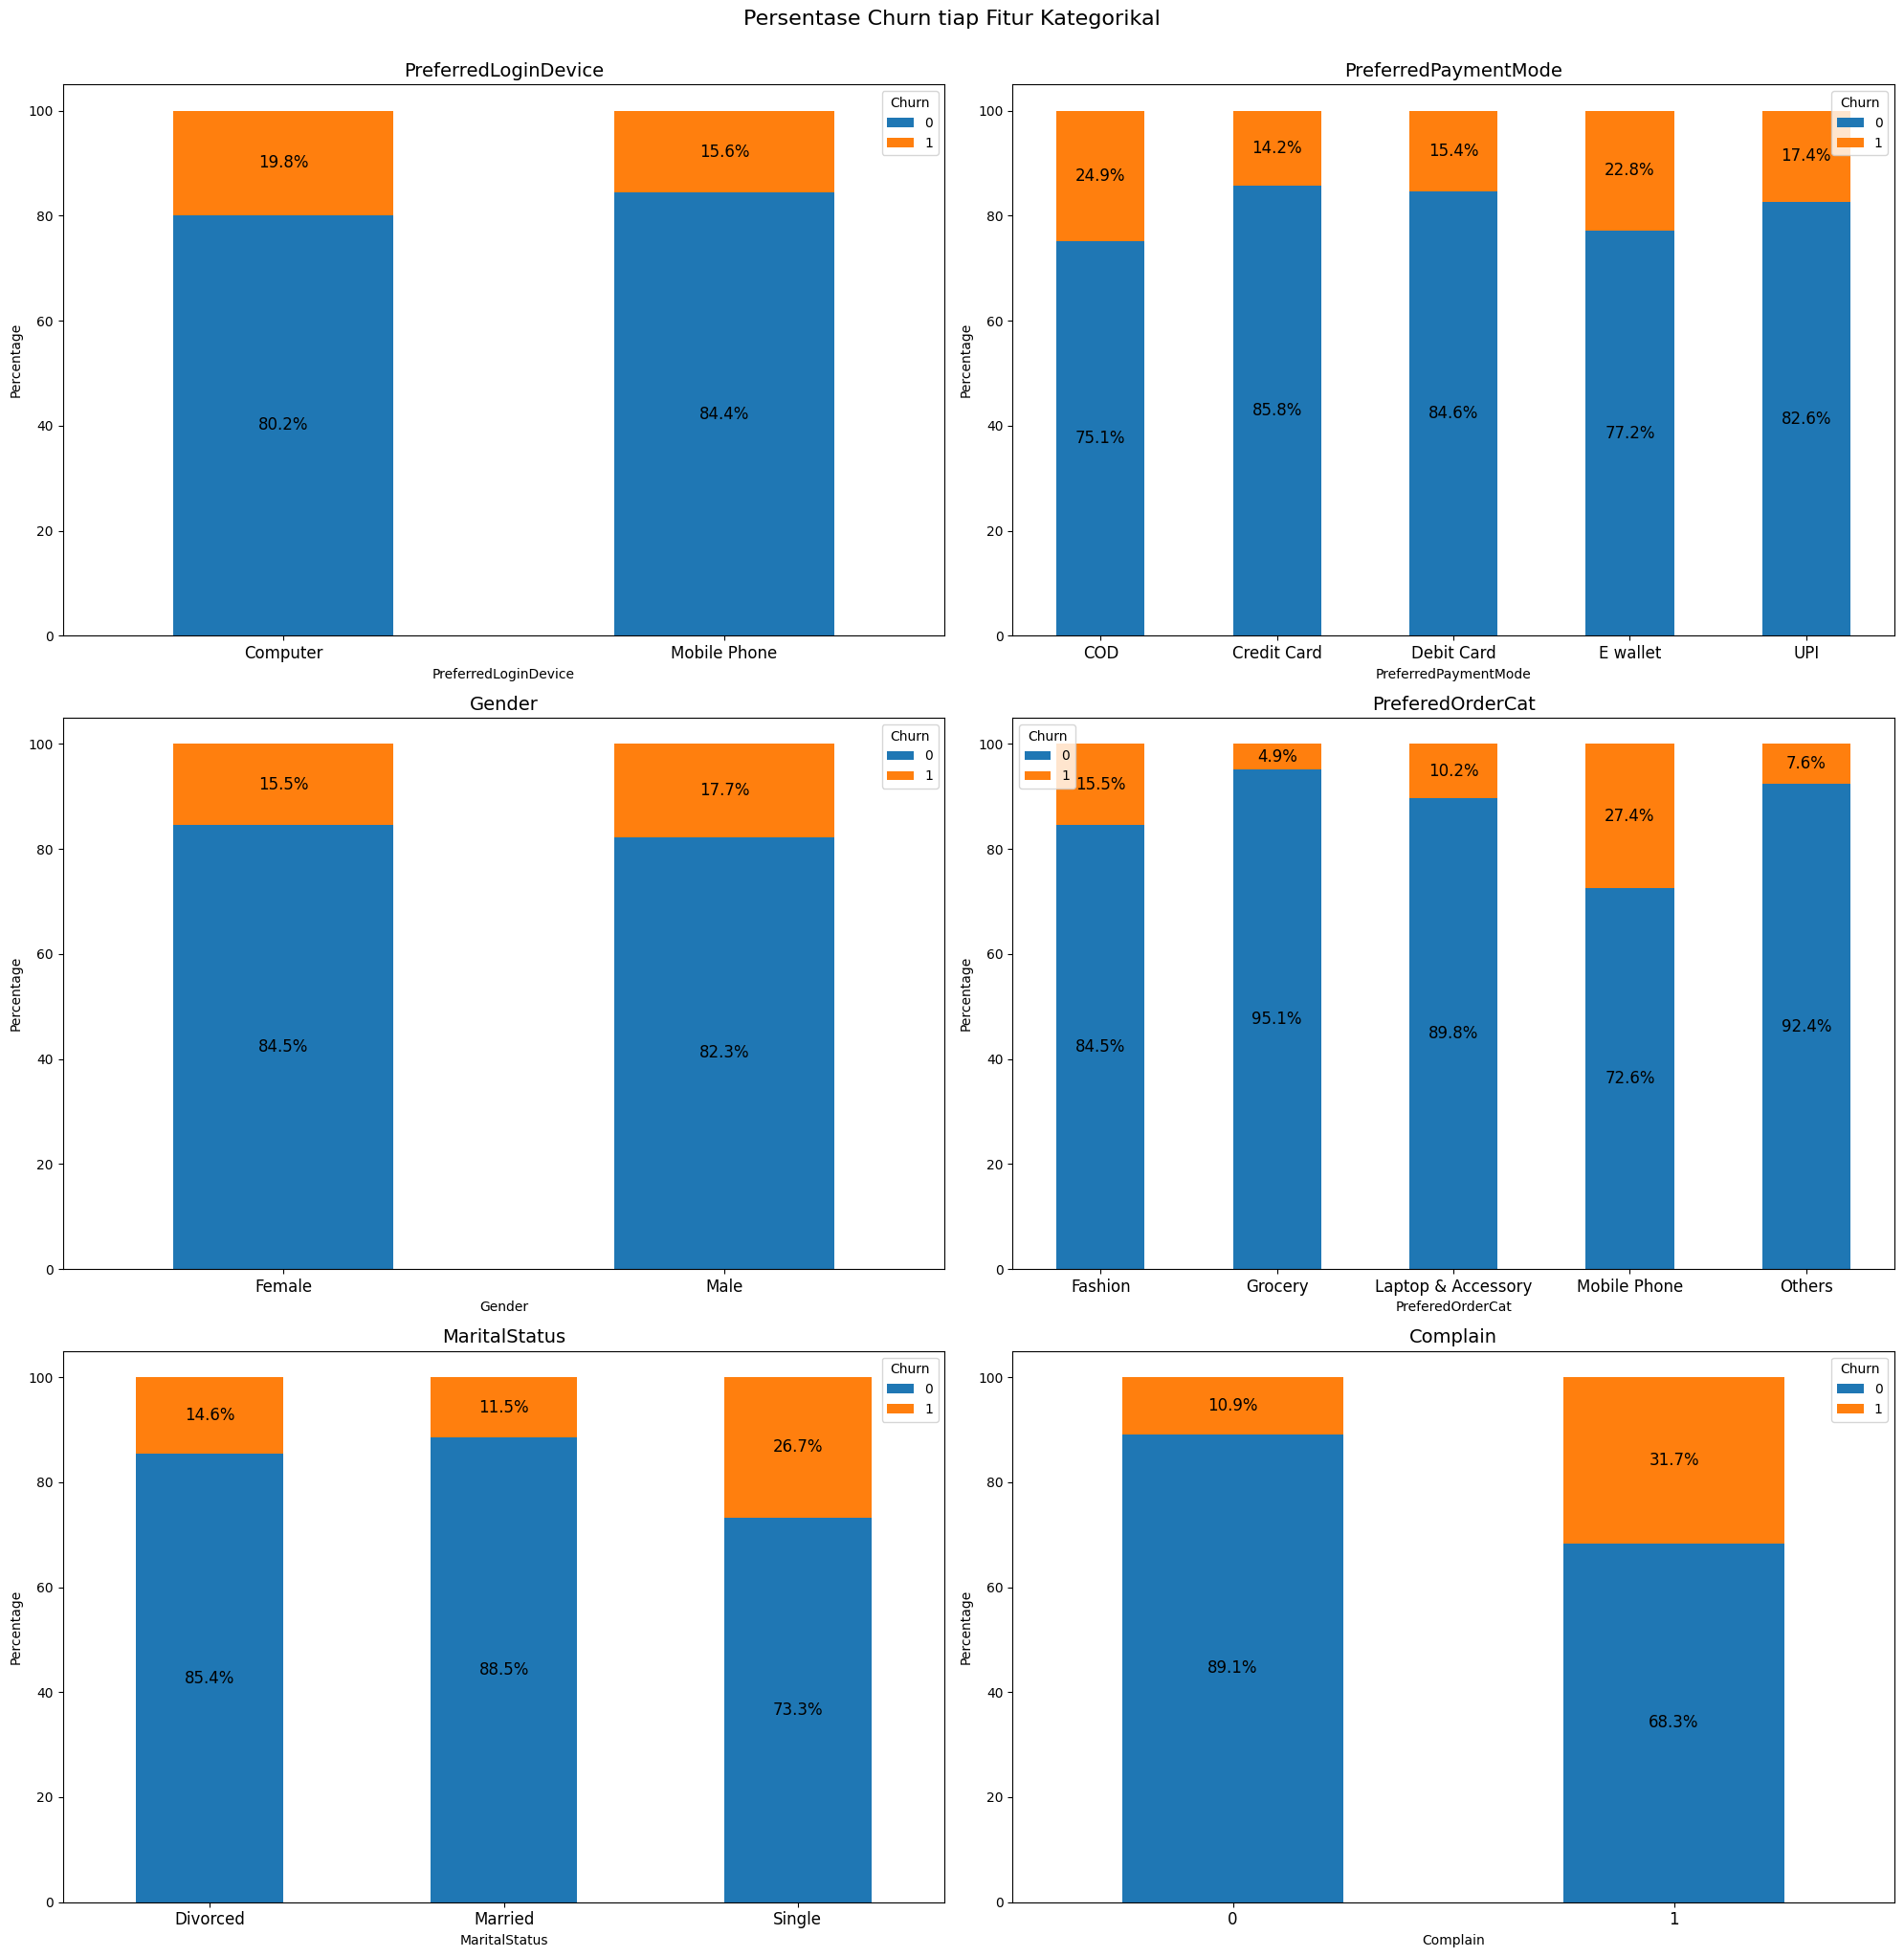

In [295]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(cat_feature):
    # Membuat crosstab dengan nilai dalam bentuk persentase
    pivot_feature_percent = pd.crosstab(index=df[feature], columns=df['Churn'], normalize='index') * 100
    
    # Membuat bar chart pada subplot yang sesuai
    ax = pivot_feature_percent.plot(kind='bar', stacked=True, ax=axes[i])
    
    # Menambahkan label dan judul
    ax.set_xlabel(feature)
    ax.set_ylabel('Percentage')
    ax.set_title(feature, fontsize=14)
    
    # Menambahkan anotasi pada setiap bar
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=12)
    
    # Menonaktifkan rotasi pada sumbu x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.suptitle('Persentase Churn tiap Fitur Kategorikal', y=1.02, fontsize=16)
plt.show()

**Insight**
- Pelanggan yang mengakses aplikasi e-commerce ini menggunakan Computer lebih banyak yang Churn 19.8% dibandingkan dengan menggunakan Mobile Phone 15.6%. Namun perbedaan persentase Churn antara keduanya tidak berbeda jauh.
- Metode pembayaran dengan COD ternyata memiliki nilai Churn yang paling tinggi 24.9% dibandingkan dengan metode pembayaran lainnya. Kemudian metode pembayaran menggunakan Credit Card memiliki nilai Churn yang paling rendah, yaitu sebesar 14.2%.
- Pelanggan laki-laki lebih banyak Churn 17.7% dibandingkan dengan pelanggan perempuan  15.5%. Namun perbedaan persentase Churn antara keduanya tidak berbeda jauh.
- Produk yang paling banyak memiliki pelanggan Churn adalah Mobile Phone 27.4% dibanding dengan produk lainnya. Kemudian yang paling sedikit pelanggan yang Chrun berada pada produk Grocery 4.9%
- Pelanggan dengan status pernikahan Single paling banyak Churn 26.7%. Status single, didominasi oleh orang dengan usia muda dan merekalah yang paling mahir terhadap teknologi. Kemudian orang di usia muda juga cenderung menggunakan lebih dari satu platform E-commerce. Sehingga mereka akan stay pada platform yang menurut mereka paling baik. 
- Pelanggan yang pernah mengajukan Complain salam satu bulan terakhir merupakan pelanggan yang paling banyak Churn 31.7%dibandingkan dengan yang tidak mengajukan complain 10.9%. Perbedaan nilanya sangat signifikan. Pelanggan yang mengajukan complain biasanya kurang puas dan bisa merasa kecewa terhadap E-Commerce yang mereka gunakan, maka dari itu mereka akan cenderung untuk Churn.

# **Machine Learning Model**

Karena datanya sudah kita bersihkan di tahap Data Cleaning, kita akan lanjut ke tahap modeling.

### **1. Define X (Feature) and y (Target)**

In [296]:
x = df.drop(columns=['CustomerID','Churn'])
y = df['Churn']
display(x.head(),y.head())

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,9.0,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,9.0,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,0.0,Mobile Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,130


0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

## **2. Preprocessing**
Untuk tahap modeling, semua data categorical perlu kita konversi menjadi data numerikal, menggunakan encoding.<br>
Semua data numerikal juga akan kita scaling untuk meningkatkan akurasi model kita.

In [297]:
for column in x.describe(include='object').columns:
    values = df[column].unique()
    print(f'{column}: {values}')

PreferredLoginDevice: ['Mobile Phone' 'Computer']
PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'COD' 'E wallet']
Gender: ['Female' 'Male']
PreferedOrderCat: ['Laptop & Accessory' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus: ['Single' 'Divorced' 'Married']
